# Shut the Box

## Step 0: Utils for Jupyter Notebooks

### Add button to Show/Hide code (to focus on outputs)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show Code"></form>''')

### Add magic command to store python variables in csv file

In [2]:
# credit to sirex, https://github.com/ipython/ipython/issues/6701
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

## Step 1: Generate models

In [155]:
# Edit this cell to define parameters for your model...

boards = 12 # Number of boards to use
sides = 6 # Number of sides per die
die = 2 # Number of die to roll each round

max_score = boards * (boards+1) // 2

In [157]:
%%writetemplate ShutTheBox/stb_params_high.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, 1

In [159]:
%%writetemplate ShutTheBox/stb_params_low.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, 2

In [161]:
%%writetemplate ShutTheBox/stb_nondet_params.csv
b, {boards}
d, {sides}
ndie, {die}
strategy, 0

In [163]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6_high.prism ShutTheBox/stb_params_high.csv

Model generated successfully at ShutTheBox\stb6_high.prism


In [165]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6_low.prism ShutTheBox/stb_params_low.csv

Model generated successfully at ShutTheBox\stb6_low.prism


In [167]:
!python utils/pyprism.py ShutTheBox/stb.pyprism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb_nondet_params.csv

Model generated successfully at ShutTheBox\stb6test_nondet.prism


In [169]:
# Generate properties file too
!python utils/pyprism.py ShutTheBox/stbprops.pyprism ShutTheBox/stb6test.props ShutTheBox/stb_params_high.csv

Model generated successfully at ShutTheBox\stb6test.props


## Step 2: Check properties, run experiments, export data

### Does the game eventually always terminate?

We expect to see a value of approximately 1 here (it won't be exact because CSGs only support methods based on numerical convergence, so it may be slightly under or even over 1!

In [171]:
!prism ShutTheBox/stb6_high.prism ShutTheBox/stb6test.props -prop 1 | grep -E "(Model checking)|(Result)|(sec)"

Model checking: <<p1>>Pmax=? [ F game_over ]
Reachable states exploration and model construction done in 5.544 secs.
Time for model construction: 5.674 seconds.
Precomputation took 0.846 seconds.
Time for model checking: 3.428 seconds.
Result: 1.0000000000000002 (value in the initial state)


### Probability of obtaining each score 

In [173]:
prob_score_high_file = "ShutTheBox/data/prob_score_high.csv"

!prism ShutTheBox/stb6_high.prism ShutTheBox/stb6.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_high_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)|(sec)"

Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=1
Reachable states exploration and model construction done in 5.553 secs.
Time for model construction: 5.684 seconds.
Precomputation took 0.203 seconds.
Time for model checking: 0.354 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=2
Precomputation took 0.776 seconds.
Time for model checking: 0.847 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=3
Precomputation took 0.114 seconds.
Time for model checking: 0.172 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=4
Precomputation took 0.109 seconds.
Time for model checking: 0.163 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=5
Precomputation too

In [175]:
prob_score_low_file = "ShutTheBox/data/prob_score_low.csv"

!prism ShutTheBox/stb6_low.prism ShutTheBox/stb6.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_low_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)|(sec)"

Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=1
Reachable states exploration and model construction done in 0.834 secs.
Time for model construction: 0.873 seconds.
Precomputation took 0.028 seconds.
Time for model checking: 0.067 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=2
Precomputation took 0.114 seconds.
Time for model checking: 0.152 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=3
Precomputation took 0.132 seconds.
Time for model checking: 0.146 seconds.
Result: 0.0015432098765432098 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=4
Precomputation took 0.108 seconds.
Time for model checking: 0.117 seconds.
Result: 0.004629629629629629 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Propert

In [162]:
prob_score_nondet_min_file = "ShutTheBox/data/prob_score_nondet_min.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6test.props -prop 2 -const k=1:{max_score} -exportresults {prob_score_nondet_min_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)|(sec)"

Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=1
Reachable states exploration and model construction done in 8.019 secs.
Time for model construction: 8.194 seconds.
Precomputation took 0.492 seconds.
Time for model checking: 0.692 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=2
Precomputation took 0.878 seconds.
Time for model checking: 0.948 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=3
Precomputation took 0.638 seconds.
Time for model checking: 0.693 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=4
Precomputation took 0.553 seconds.
Time for model checking: 0.604 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score=k ]
Property constants: k=5
Precomputation too

In [164]:
prob_score_nondet_max_file = "ShutTheBox/data/prob_score_nondet_max.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6test.props -prop 3 -const k=1:{max_score} -exportresults {prob_score_nondet_max_file}:csv | grep -E "(Model checking)|(Result)|(Property constants)|(sec)"

Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=1
Reachable states exploration and model construction done in 8.229 secs.
Time for model construction: 8.416 seconds.
Precomputation took 0.223 seconds.
Time for model checking: 0.396 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=2
Precomputation took 1.3 seconds.
Time for model checking: 1.394 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=3
Precomputation took 0.93 seconds.
Time for model checking: 1.0 seconds.
Result: 0.0015432098765432098 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property constants: k=4
Precomputation took 0.859 seconds.
Time for model checking: 0.92 seconds.
Result: 0.004629629629629629 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score=k ]
Property cons

### Expected number of die rolls

In [166]:
print("High board strategy:")
!prism ShutTheBox/stb6_high.prism ShutTheBox/stb6.props -prop 9 | grep -E "(Model checking)|(Result)|(sec)"
print("Low board strategy:")
!prism ShutTheBox/stb6_low.prism ShutTheBox/stb6.props -prop 9 | grep -E "(Model checking)|(Result)|(sec)"

High board strategy:
Model checking: <<p1>>R{"no_rolls"}max=? [ F game_over ]
Reachable states exploration and model construction done in 7.728 secs.
Time for model construction: 7.908 seconds.
Computed an over-approximation of the solution (in 2.619 seconds), this will now be used to get the solution
Expected reachability took 5.964 seconds.
Precomputation took 0.893 seconds.
Time for model checking: 6.028 seconds.
Result: 7.006172038789394 (value in the initial state)
Low board strategy:
Model checking: <<p1>>R{"no_rolls"}max=? [ F game_over ]
Reachable states exploration and model construction done in 0.795 secs.
Time for model construction: 0.836 seconds.
Computed an over-approximation of the solution (in 0.492 seconds), this will now be used to get the solution
Expected reachability took 0.993 seconds.
Precomputation took 0.175 seconds.
Time for model checking: 1.011 seconds.
Result: 4.219568128753051 (value in the initial state)


### Probability of obtaining a score given a particular board is covered

In [168]:
for covered_board in range(1, boards+1):
    !prism ShutTheBox/stb6test.prism ShutTheBox/stb6.props -prop {10+covered_board} -const k=1:{max_score} -exportresults ShutTheBox/data/score_given_{covered_board}.csv:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)|(sec)"
    !echo ========

ecking: <<p1>>Pmin=? [ F game_over&b6=1&score=k ]/<<p1>>Pmin=? [ F game_over&b6=1 ]
Property constants: k=5
Precomputation took 0.0 seconds.
Precomputation took 0.006 seconds.
Time for model checking: 0.022 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b6=1&score=k ]/<<p1>>Pmin=? [ F game_over&b6=1 ]
Property constants: k=6
Precomputation took 0.001 seconds.
Precomputation took 0.008 seconds.
Time for model checking: 0.024 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b6=1&score=k ]/<<p1>>Pmin=? [ F game_over&b6=1 ]
Property constants: k=7
Precomputation took 0.002 seconds.
Precomputation took 0.01 seconds.
Time for model checking: 0.025 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&b6=1&score=k ]/<<p1>>Pmin=? [ F game_over&b6=1 ]
Property constants: k=8
Precomputation took 0.001 seconds.
Precomputation took 0.007 seconds.
Time for model checking:

### Cumulative probability of a score

In [170]:
cum_prob_high_file = "ShutTheBox/data/cum_prob_high.csv"

!prism ShutTheBox/stb6_high.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults {cum_prob_high_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)|(sec)"

Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=1
Reachable states exploration and model construction done in 5.773 secs.
Time for model construction: 5.902 seconds.
Precomputation took 0.143 seconds.
Time for model checking: 0.277 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=2
Precomputation took 0.834 seconds.
Time for model checking: 0.925 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=3
Precomputation took 0.642 seconds.
Time for model checking: 0.697 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=4
Precomputation took 0.562 seconds.
Time for model checking: 0.613 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Pro

In [172]:
cum_prob_low_file = "ShutTheBox/data/cum_prob_low.csv"

!prism ShutTheBox/stb6_low.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults {cum_prob_low_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)|(sec)"

Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=1
Reachable states exploration and model construction done in 0.896 secs.
Time for model construction: 0.935 seconds.
Precomputation took 0.03 seconds.
Time for model checking: 0.069 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=2
Precomputation took 0.11 seconds.
Time for model checking: 0.145 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=3
Precomputation took 0.13 seconds.
Time for model checking: 0.147 seconds.
Result: 0.0023148148148148147 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=4
Precomputation took 0.164 seconds.
Time for model checking: 0.177 seconds.
Result: 0.006944444444444444 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Prope

In [174]:
cum_prob_min_file = "ShutTheBox/data/cum_prob_min.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6.props -prop 5 -const k=1:{max_score} -exportresults {cum_prob_min_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)|(sec)"

Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=1
Reachable states exploration and model construction done in 6.783 secs.
Time for model construction: 6.958 seconds.
Precomputation took 0.49 seconds.
Time for model checking: 0.636 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=2
Precomputation took 1.106 seconds.
Time for model checking: 1.184 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=3
Precomputation took 0.925 seconds.
Time for model checking: 0.984 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Property constants: k=4
Precomputation took 0.836 seconds.
Time for model checking: 0.892 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmin=? [ F game_over&score<=k ]
Prop

In [176]:
cum_prob_max_file = "ShutTheBox/data/cum_prob_max.csv"

!prism ShutTheBox/stb6test_nondet.prism ShutTheBox/stb6.props -prop 6 -const k=1:{max_score} -exportresults {cum_prob_max_file}:csv | grep -E "(Model checking)|(Result)|(Property constant)|(Exporting results)|(sec)"

Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=1
Reachable states exploration and model construction done in 7.958 secs.
Time for model construction: 8.138 seconds.
Precomputation took 0.503 seconds.
Time for model checking: 0.644 seconds.
Result: 0.0 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=2
Precomputation took 0.871 seconds.
Time for model checking: 0.955 seconds.
Result: 7.716049382716049E-4 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=3
Precomputation took 0.884 seconds.
Time for model checking: 0.947 seconds.
Result: 0.0023148148148148147 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Property constants: k=4
Precomputation took 0.79 seconds.
Time for model checking: 0.848 seconds.
Result: 0.006944444444444444 (value in the initial state)
Model checking: <<p1>>Pmax=? [ F game_over&score<=k ]
Pro

## Step 3: Visualisations

### Probability of obtaining each score

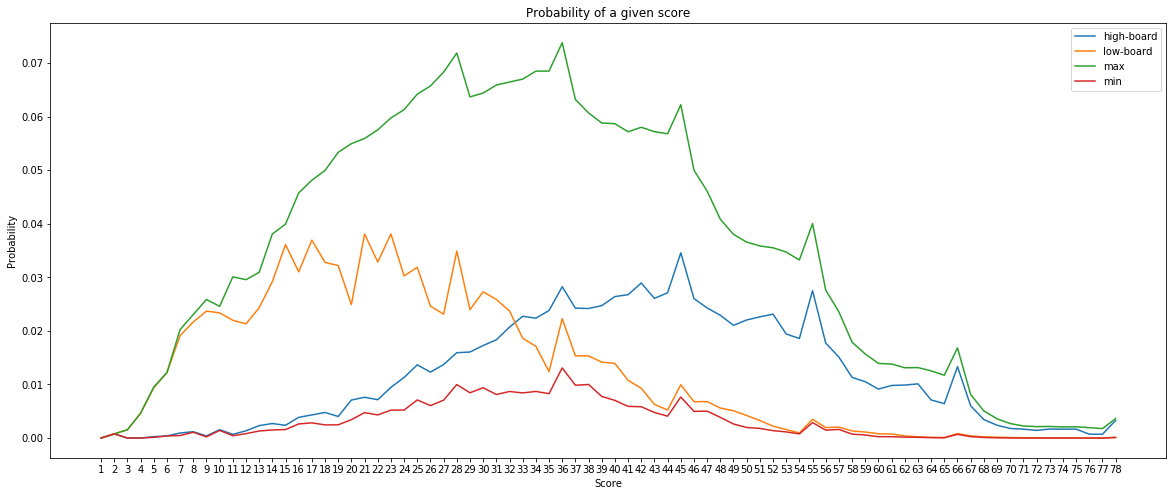

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import csv

plt.rcParams['figure.figsize'] = [20, 8]

def plot(axes, csv_file, series_name, kwargs={}):
    # given a set of axes and a csv filename, reads data from the csv file and plots it on the graph

    data = np.genfromtxt(csv_file, delimiter=',',skip_header=1, names=['x', 'y'])
    ax1.plot(data['x'], data['y'], label=series_name, **kwargs)



fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Probability of a given score")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, prob_score_high_file, "high-board")

plot(ax1, prob_score_low_file, "low-board")

plot(ax1, prob_score_nondet_max_file, "max")

plot(ax1, prob_score_nondet_min_file, "min")

leg = ax1.legend()

plt.savefig('ShutTheBox/data/vis/prob_score.png')

plt.show()



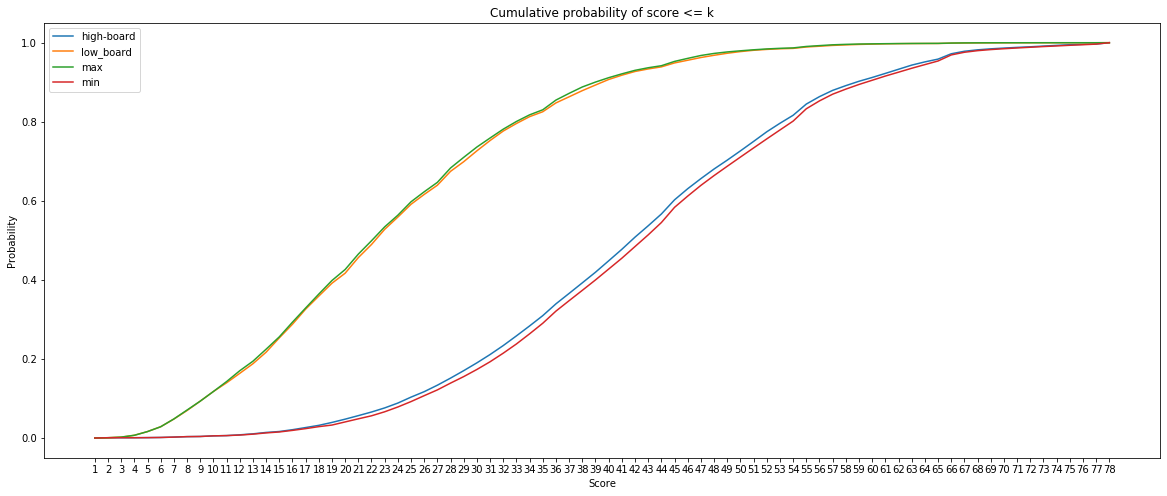

In [133]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Cumulative probability of score <= k")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability")

ax1.set_xticks(np.arange(max_score)+1)

plot(ax1, cum_prob_high_file, "high-board")

plot(ax1, cum_prob_low_file, "low_board")

plot(ax1, cum_prob_max_file, "max")

plot(ax1, cum_prob_min_file, "min")

leg = ax1.legend()

plt.savefig('ShutTheBox/data/vis/cum_prob.png')
plt.show()

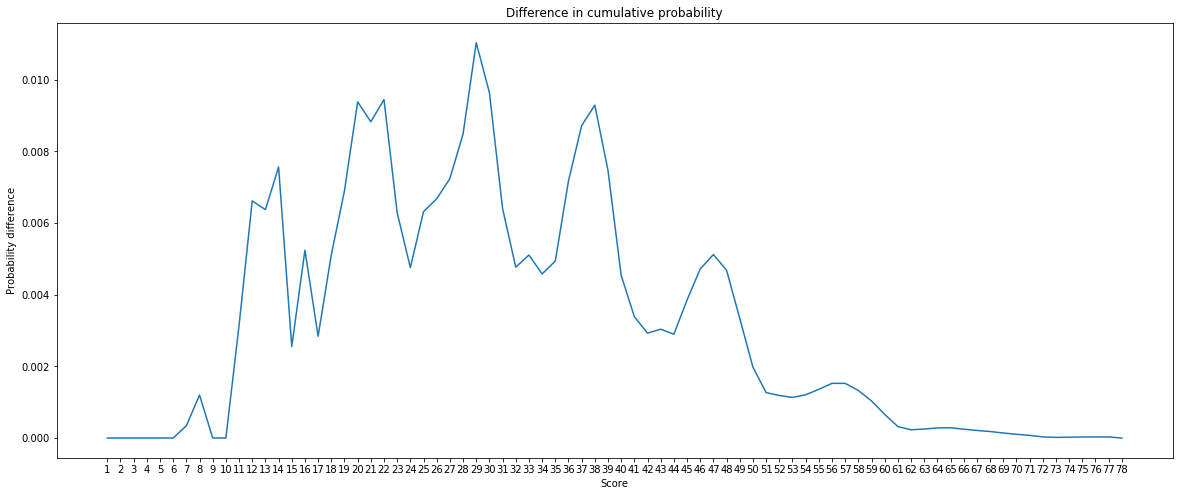

In [134]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Difference in cumulative probability")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability difference")

ax1.set_xticks(np.arange(max_score)+1)

data_max = np.genfromtxt(cum_prob_max_file, delimiter=',',skip_header=1, names=['x', 'y'])
data_low = np.genfromtxt(cum_prob_low_file, delimiter=',',skip_header=1, names=['x', 'y'])

data_diff = data_max['y'] - data_low['y']

ax1.plot(data_max['x'], data_diff)

plt.savefig('ShutTheBox/data/vis/cum_diff_max_low.png')
plt.show()


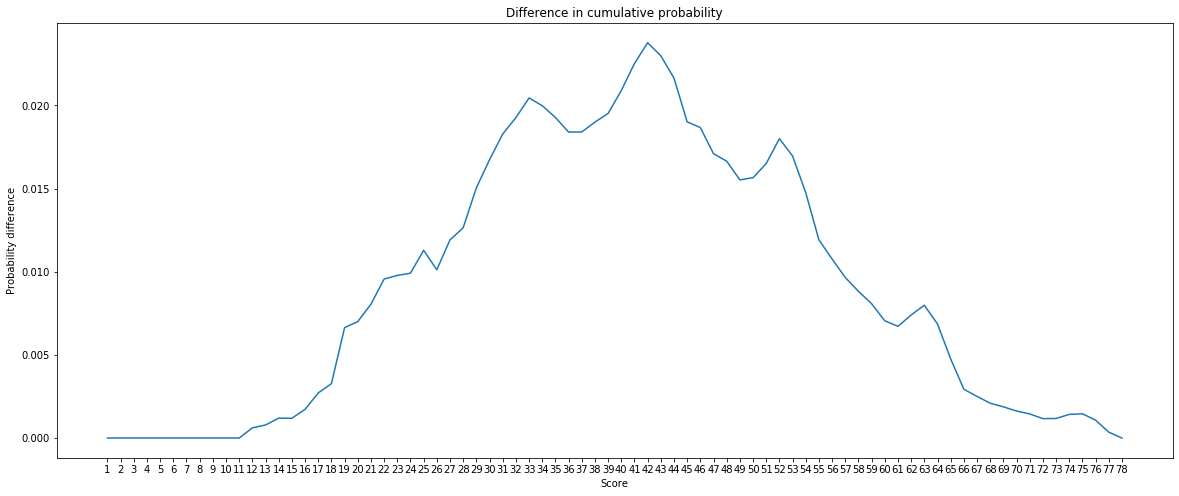

In [135]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("Difference in cumulative probability")
ax1.set_xlabel("Score")
ax1.set_ylabel("Probability difference")

ax1.set_xticks(np.arange(max_score)+1)

data_high = np.genfromtxt(cum_prob_high_file, delimiter=',',skip_header=1, names=['x', 'y'])
data_min = np.genfromtxt(cum_prob_min_file, delimiter=',',skip_header=1, names=['x', 'y'])

data_diff = data_high['y'] - data_min['y']

ax1.plot(data_min['x'], data_diff


plt.savefig('ShutTheBox/data/vis/cum_diff_high_min.png')
plt.show()